# Import Python libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline

# Case
Let's say we have three clubs `A`, `B`, and `C`, which have `200`, `140`, and `50` members, respectively. Also, we know there are `120` people is a member of club A and also a member of club B, `35` members in club A also a member in club C, `30` members in club B also a member of club C.

In [2]:
# Define sets
# u = set union
# n = set intersection

A = 200
B = 140
C = 50
AnB = 120
AnC = 35
BnC = 30

In [3]:
def calculate_set_membership(A: int, B: int, AnB: int, AnC: int, BnC: int,
                             C=False, verbose: bool = False):
    """
    Given three set sizes, and their intersection sizes, calculate all seven areas to 
    visualize Venn diagram. Returns integer values in list representing 
    AnB_only = 0  # AnB club members only
    AnC_only = 0  # AnC club members only
    BnC_only = 0  # BnC club members only
    A_only = 0  # A club members only
    B_only = 0 # B club members only
    C_only = 0  # C club members only, only iff C set size is provided

    :param A: Integer representing Set A size (REQUIRED INPUT)
    :param B: Integer representing Set B size (REQUIRED INPUT)
    :param AnB: Integer representing Set A and B intersection size (REQUIRED INPUT)
    :param AnC: Integer representing Set A and C intersection size (REQUIRED INPUT)
    :param BnC: Integer representing Set B and C intersection size (REQUIRED INPUT)
    :param C: Integer representing Set C size (OPTIONAL INPUT). Set to False, by default.
    :param verbose: Print runtime messages. Not printed by default.
    """
    AnB_only = 0  # minimum value for AnB club members only
    AnC_only = 0  # minimum value for AnC club members only
    BnC_only = 0  # minimum value for BnC club members only
    A_only = 0    # minimum value for A club members only
    B_only = 0    # minimum value for B club members only
    C_only = 0    # minimum value for C club members only
    output = []   # save output into a list

    max_AnBnC = min([AnB, BnC, AnC])  # max value for AnBnC

    for i in range(max_AnBnC + 1):  # i = AnBnC value range [0, max_AnBnC)
        AnB_only = AnB - i  # AnB club members only
        if AnB_only < 0:
            if verbose:
                print(
                    f"AnBnC cannot equal {i}, otherwise AnB only membership goes below 0 member")
            continue

        AnC_only = AnC - i  # AnC club members only
        if AnC_only < 0:
            if verbose:
                print(
                    f"AnBnC cannot equal {i}, otherwise AnC only membership goes below 0 member")
            continue

        BnC_only = BnC - i  # BnC club members only
        if BnC_only < 0:
            if verbose:
                print(
                    f"AnBnC cannot equal {i}, otherwise BnC only membership goes below 0 member")
            continue

        A_only = A - AnB_only - AnC_only - i  # A club members only
        if A_only < 0:
            # A club membership cannot be less than 0
            if verbose:
                print(
                    f"AnBnC cannot equal {i}, otherwise A only membership goes below 0 member")
            continue

        B_only = B - AnB_only - BnC_only - i  # B club members only
        if B_only < 0:
            # B club membership cannot be less than 0
            if verbose:
                print(
                    f"AnBnC cannot equal {i}, otherwise B only membership goes below 0 member")
            continue

        if C:  # If C population is provided
            C_only = C - AnC_only - BnC_only - i  # C club members only
            if C_only < 0:
                # C club membership cannot be less than 0
                if verbose:
                    print(
                        f"AnBnC cannot equal {i}, otherwise C only membership goes below 0 member")
                continue

        if A_only + AnB_only + AnC_only + i == A:  # A ##

            if C:  # If C population is provided
                if B_only + AnB_only + BnC_only + i == B:  # B ##
                    if C_only + AnC_only + BnC_only + i == C:
                        output.append([A_only, B_only, AnB_only,
                                      C_only, AnC_only, BnC_only, i])
                        if verbose:
                            print(
                                f"\nConstraint satisfied for all three sets with AnBnC = {i}\nA_only = {A_only}\nB_only = {B_only}\nC_only = {C_only}\nAnB_only = {AnB_only}\nAnC_only = {AnC_only}\nBnC_only = {BnC_only}\nA_members = {sum([A_only, AnB_only, AnC_only, i])}\nB_members = {sum([B_only, AnB_only, BnC_only, i])}\nC_members = {sum([C_only, AnC_only, BnC_only, i])}"
                            )
            else:
                if B_only + AnB_only + BnC_only + i == B:  # B ##
                    output.append([A_only, B_only, AnB_only,
                                   C_only, AnC_only, BnC_only, i])
                    if verbose:
                        print(
                            f"\nConstraint satisfied for A and B clubs with AnBnC = {i}\nA_only = {A_only}\nB_only = {B_only}\nC_only = {C_only}\nAnB_only = {AnB_only}\nAnC_only = {AnC_only}\nBnC_only = {BnC_only}\nA_members = {sum([A_only, AnB_only, AnC_only, i])}\nB_members = {sum([B_only, AnB_only, BnC_only, i])}\nC_members = {sum([C_only, AnC_only, BnC_only, i])}"
                        )
    return output

# When C population is not provided

In [4]:
# Run function and get all seven regions for plotting Venn diagram
venn_diagram_data_without_C = calculate_set_membership(A, B, AnB, AnC, BnC)

# Create pandas dataframe for conveniently all viewing data
column_names = ["A_only", "B_only", "AnB_only",
                "C_only", "AnC_only", "BnC_only",
                "AnBnC"]
venn_diagram_data_without_C_df = pd.DataFrame.from_records(venn_diagram_data_without_C,
                                                           columns=column_names)

# Add columns for sets A, B and C as well as their union AuBuC
venn_diagram_data_without_C_df["A"] = venn_diagram_data_without_C_df["A_only"] + \
    venn_diagram_data_without_C_df["AnB_only"] + \
    venn_diagram_data_without_C_df["AnC_only"] + \
    venn_diagram_data_without_C_df["AnBnC"]

venn_diagram_data_without_C_df["B"] = venn_diagram_data_without_C_df["B_only"] + \
    venn_diagram_data_without_C_df["AnB_only"] + \
    venn_diagram_data_without_C_df["BnC_only"] + \
    venn_diagram_data_without_C_df["AnBnC"]

venn_diagram_data_without_C_df["C"] = venn_diagram_data_without_C_df["C_only"] + \
    venn_diagram_data_without_C_df["AnC_only"] + \
    venn_diagram_data_without_C_df["BnC_only"] + \
    venn_diagram_data_without_C_df["AnBnC"]

venn_diagram_data_without_C_df["AuBuC"] = venn_diagram_data_without_C_df["A"] + \
    venn_diagram_data_without_C_df["B"] + \
    venn_diagram_data_without_C_df["C"]

# Reindex columns for presentation
sorted_columns = ["A_only", "B_only", "AnB_only",
                  "C_only", "AnC_only", "BnC_only",
                  "AnBnC", "AuBuC", "A", "B", "C"]
venn_diagram_data_without_C_df = venn_diagram_data_without_C_df.reindex(
    columns=sorted_columns)

# Print out all data for Venn diagram
venn_diagram_data_without_C_df

,A_only,B_only,AnB_only,C_only,AnC_only,BnC_only,AnBnC,AuBuC,A,B,C
0,55,0,110,0,25,20,10,395,200,140,55
1,56,1,109,0,24,19,11,394,200,140,54
2,57,2,108,0,23,18,12,393,200,140,53
3,58,3,107,0,22,17,13,392,200,140,52
4,59,4,106,0,21,16,14,391,200,140,51
5,60,5,105,0,20,15,15,390,200,140,50
6,61,6,104,0,19,14,16,389,200,140,49
7,62,7,103,0,18,13,17,388,200,140,48
8,63,8,102,0,17,12,18,387,200,140,47
9,64,9,101,0,16,11,19,386,200,140,46


## Plot Venn diagram
Using `matplotlib-venn` library to plot Venn diagrams.
As per their documentation, exact correspondence between set sizes and region areas isn't 
possible for three circle Venn diagrams.

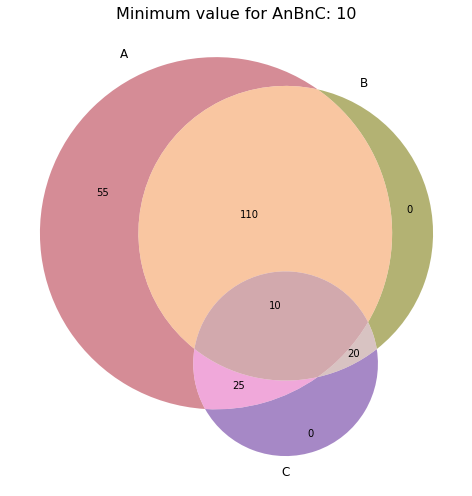

In [5]:
with mpl.style.context("fast"):  # set matplotlib plot style
    plt.figure(figsize=(7, 7))  # set figure size
    venn3(venn_diagram_data_without_C[0], set_colors=[
          "#c76674", "#9a9945", "#8961b3"], alpha=0.75)
    plt.title(
        f"Minimum value for AnBnC: {venn_diagram_data_without_C[0][-1]:2d}",
        fontdict={"size": 16})
    plt.tight_layout()
    plt.show()

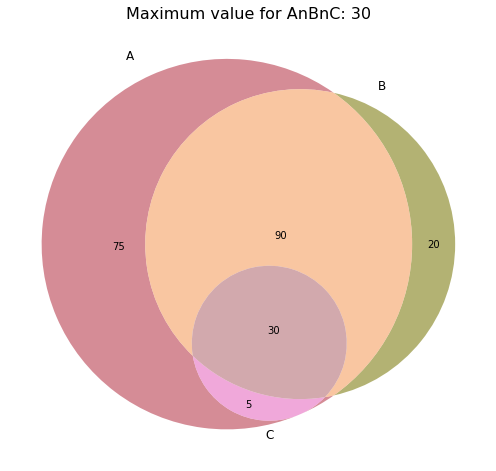

In [6]:
with mpl.style.context("fast"):  # set matplotlib plot style
    plt.figure(figsize=(7, 7))  # set figure size
    venn3(venn_diagram_data_without_C[-1], set_colors=["#c76674",
          "#9a9945", "#8961b3"], alpha=0.75)
    plt.title(
        f"Maximum value for AnBnC: {venn_diagram_data_without_C[-1][-1]:2d}",
        fontdict={"size": 16})
    plt.tight_layout()
    plt.show()

# When C population is provided

In [7]:
# Run function and get all seven regions for plotting Venn diagram
venn_diagram_data_with_C = calculate_set_membership(A, B, AnB, AnC, BnC, C=50)

# Create pandas dataframe for conveniently all viewing data
column_names = ["A_only", "B_only", "AnB_only",
                "C_only", "AnC_only", "BnC_only",
                "AnBnC"]
venn_diagram_data_with_C_df = pd.DataFrame.from_records(venn_diagram_data_with_C,
                                                           columns=column_names)

# Add columns for sets A, B and C as well as their union AuBuC
venn_diagram_data_with_C_df["A"] = venn_diagram_data_with_C_df["A_only"] + \
    venn_diagram_data_with_C_df["AnB_only"] + \
    venn_diagram_data_with_C_df["AnC_only"] + \
    venn_diagram_data_with_C_df["AnBnC"]

venn_diagram_data_with_C_df["B"] = venn_diagram_data_with_C_df["B_only"] + \
    venn_diagram_data_with_C_df["AnB_only"] + \
    venn_diagram_data_with_C_df["BnC_only"] + \
    venn_diagram_data_with_C_df["AnBnC"]

venn_diagram_data_with_C_df["C"] = venn_diagram_data_with_C_df["C_only"] + \
    venn_diagram_data_with_C_df["AnC_only"] + \
    venn_diagram_data_with_C_df["BnC_only"] + \
    venn_diagram_data_with_C_df["AnBnC"]

venn_diagram_data_with_C_df["AuBuC"] = venn_diagram_data_with_C_df["A"] + \
    venn_diagram_data_with_C_df["B"] + \
    venn_diagram_data_with_C_df["C"]

# Reindex columns for presentation
sorted_columns = ["A_only", "B_only", "AnB_only",
                  "C_only", "AnC_only", "BnC_only",
                  "AnBnC", "AuBuC", "A", "B", "C"]
venn_diagram_data_with_C_df = venn_diagram_data_with_C_df.reindex(
    columns=sorted_columns)

# Print out all data for Venn diagram
venn_diagram_data_with_C_df

,A_only,B_only,AnB_only,C_only,AnC_only,BnC_only,AnBnC,AuBuC,A,B,C
0,60,5,105,0,20,15,15,390,200,140,50
1,61,6,104,1,19,14,16,390,200,140,50
2,62,7,103,2,18,13,17,390,200,140,50
3,63,8,102,3,17,12,18,390,200,140,50
4,64,9,101,4,16,11,19,390,200,140,50
5,65,10,100,5,15,10,20,390,200,140,50
6,66,11,99,6,14,9,21,390,200,140,50
7,67,12,98,7,13,8,22,390,200,140,50
8,68,13,97,8,12,7,23,390,200,140,50
9,69,14,96,9,11,6,24,390,200,140,50


## Plot Venn diagram
Using `matplotlib-venn` library to plot Venn diagrams.
As per their documentation, exact correspondence between set sizes and region areas isn't 
possible for three circle Venn diagrams.

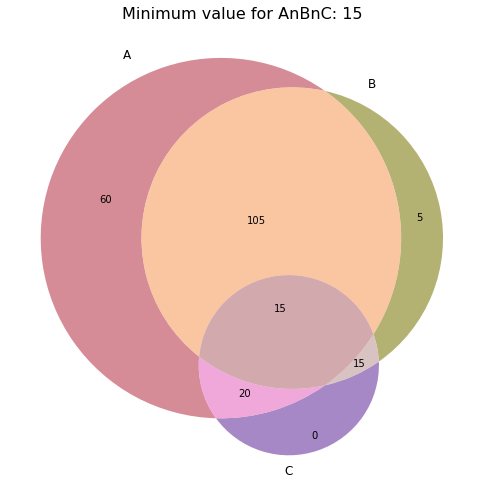

In [8]:
with mpl.style.context("fast"):  # set matplotlib plot style
    plt.figure(figsize=(7, 7))  # set figure size
    venn3(venn_diagram_data_with_C[0], set_colors=[
          "#c76674", "#9a9945", "#8961b3"], alpha=0.75)
    plt.title(
        f"Minimum value for AnBnC: {venn_diagram_data_with_C[0][-1]:2d}",
        fontdict={"size": 16})
    plt.tight_layout()
    plt.show()

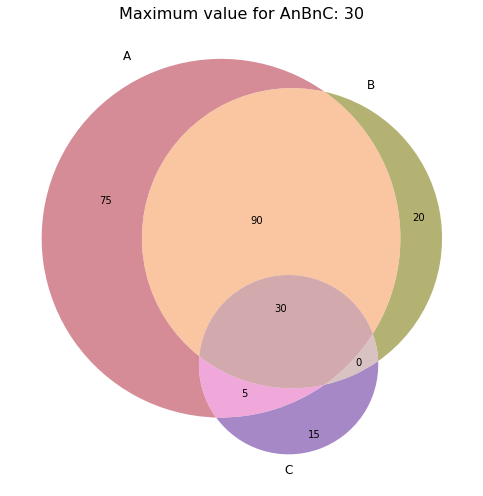

In [9]:
with mpl.style.context("fast"):  # set matplotlib plot style
    plt.figure(figsize=(7, 7))  # set figure size
    venn3(venn_diagram_data_with_C[-1], set_colors=["#c76674",
          "#9a9945", "#8961b3"], alpha=0.75)
    plt.title(
        f"Maximum value for AnBnC: {venn_diagram_data_with_C[-1][-1]:2d}",
        fontdict={"size": 16})
    plt.tight_layout()
    plt.show()